# PROJECT DESCRPTION 
I work for an online store Ice, that sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. 

I need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns. 

I am going to do this with access to data going back to 2016. The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating suc as Teen or Mature. 

#### OPEN DATA FILE AND STUDY THE GENERAL INFORMATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
data = pd.read_csv('/datasets/games.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### PREPARE THE DATA

In [2]:
# Changing all column names to lower cases.
data.columns = ['name','platform','year_of_release','genre','na_sales','eu_sales','jp_sales','other_sales','critic_score','user_score','rating']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
# Checking for missing values
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [4]:
#Dropping missing values in year_of_release column
data.dropna(subset=['year_of_release','name'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [5]:
# Re-checking for missing values
data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

The criric score, user score might be missing because users did not score nor was the game criticed after it was played. Since critic score and user score are  missing, the rating cannot be complete as these are criteria for rating in the first place.

In [22]:
# Replacing NaN and tbd - to be determined with 0 in critic_score and user_score columns
data['critic_score'].fillna(0.0, inplace = True)
data[data['user_score'] == 'tbd'].fillna(0, inplace = True)
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data.isnull().sum()

name               0   
platform           0   
year_of_release    0   
genre              0   
na_sales           0   
eu_sales           0   
jp_sales           0   
other_sales        0   
critic_score       0   
user_score         8981
rating             6676
total_sales        0   
dtype: int64

In [7]:
# Converting year_of_release and user_score columns to their required dtypes
data['year_of_release'] = data['year_of_release'].astype(int)
data['user_score'] = data['user_score'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [8]:
# Calculating the sum sales in all regions (total sales) for each game
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,NaN,NaN,31.38


#### ANALZE THE DATA

In [9]:
# Number of games released in different years
data.sort_values(['year_of_release'], ascending = True, inplace = True)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1764,Kaboom!,2600,1980,Misc,1.07,0.07,0.0,0.01,0.0,NaN,NaN,1.15
546,Missile Command,2600,1980,Shooter,2.56,0.17,0.0,0.03,0.0,NaN,NaN,2.76
1968,Defender,2600,1980,Misc,0.99,0.05,0.0,0.01,0.0,NaN,NaN,1.05
6300,Bridge,2600,1980,Misc,0.25,0.02,0.0,0.00,0.0,NaN,NaN,0.27
5360,Freeway,2600,1980,Action,0.32,0.02,0.0,0.00,0.0,NaN,NaN,0.34


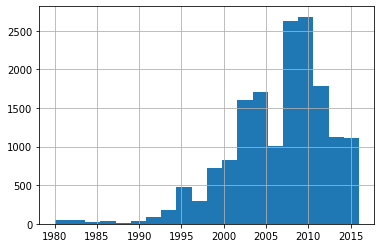

In [10]:
# Showing the number of games released in different years
data['year_of_release'].hist(bins=20);

In [11]:
# How are sales varied from platform to platform
data_platform = data.groupby(data['platform']).count()

# Showing platforms with the greatest total sales
data_platform[data_platform['total_sales'] == data_platform['total_sales'].max()]

,name,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
platform,,,,,,,,,,,
PS2,2127,2127,2127,2127,2127,2127,2127,2127,1220,1456,2127


In [12]:
data_ps2 = data[data['platform'] == 'PS2']
data_ps2

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
9998,DOA 2: Dead or Alive 2 Hardcore,PS2,2000,Fighting,0.00,0.00,0.11,0.00,0.0,NaN,NaN,0.11
1188,Smuggler's Run,PS2,2000,Racing,0.77,0.60,0.00,0.20,79.0,6.8,T,1.57
2596,Armored Core 2,PS2,2000,Simulation,0.28,0.22,0.23,0.07,78.0,8.4,T,0.80
6597,Surfing H3O,PS2,2000,Sports,0.12,0.10,0.00,0.03,46.0,4.6,E,0.25
5883,Rayman 2: Revolution,PS2,2000,Platform,0.15,0.11,0.00,0.04,90.0,8.2,E,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...
10124,WWE All Stars,PS2,2011,Fighting,0.05,0.04,0.00,0.01,0.0,3.4,T,0.10
12525,Pro Evolution Soccer 2012,PS2,2011,Action,0.00,0.00,0.06,0.00,0.0,8.2,E,0.06
11237,FIFA 12,PS2,2011,Sports,0.00,0.02,0.00,0.06,0.0,NaN,NaN,0.08
15378,Moujuutsukai to Oujisama: Snow Bride,PS2,2011,Adventure,0.00,0.00,0.02,0.00,0.0,NaN,NaN,0.02


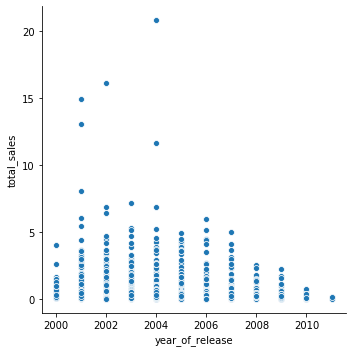

In [13]:
# Showing distribution of PS2 for each year
sns.relplot(x='year_of_release',y='total_sales', data=data_ps2);

In [14]:
# Permanently changes the pandas settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

# Showing platforms that use to be popular but now make zero sales
pd.set_option('display.max_columns', None)
data.pivot_table(index = ['year_of_release'], values = 'total_sales', columns = ['platform'], aggfunc = 'sum')

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,53.44,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,0.74,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,NaN,NaN,45.01,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Platforms that used to be popular but now make zero sales are: DS, GB, GBA, GC, N64, PS, PS2, SNES.

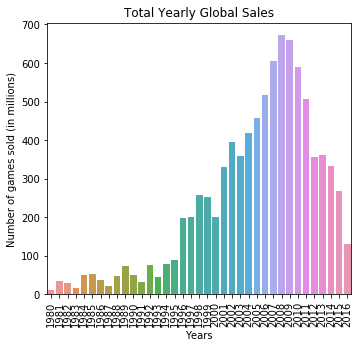

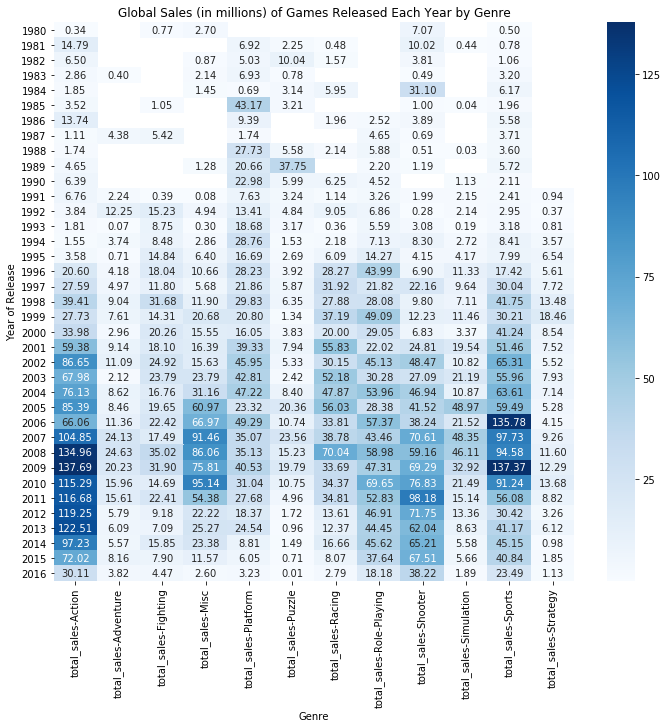

In [15]:
# Determining what period data should be taken for.

# Creating a table of the total global sales for each genre and year of release
sales_by_gen_and_year = pd.pivot_table(data,index=['year_of_release'], columns=['genre'],values=['total_sales'],aggfunc=np.sum)

# Finding the yearly totals
yearly_totals = sales_by_gen_and_year.sum(axis=1)
yearly_totals = yearly_totals.sort_index()

# Plotting the yearly totals
fig = plt.figure(figsize=(12,5))
ax1=fig.add_subplot(121)
sns.barplot(y = yearly_totals.values, x = yearly_totals.index,ax=ax1)
ax1.set_title('Total Yearly Global Sales')
plt.setp(ax1.get_xticklabels(),rotation=90)
ax1.set_xlabel('Years')
ax1.set_ylabel('Number of games sold (in millions)')

# Plotting the heat map of global sales for games released each year by genre
plt.figure(figsize=(10,10))
sns.heatmap(sales_by_gen_and_year,annot = True, fmt = '.2f', cmap = 'Blues')
plt.tight_layout()
plt.ylabel('Year of Release')
plt.xlabel('Genre')
plt.title('Global Sales (in millions) of Games Released Each Year by Genre')
plt.show()

Using these two plots above it can be seen that genres are not fully represented until 1991 and more than 95% of the global sales occur after 1991. Hence, we will start by only considering video game sales from 1991 to 2016.

In [16]:
# Pulling data from 1991 to 2016
data1 = data.loc[data.year_of_release >= 1991]
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16223 entries, 11344 to 16714
Data columns (total 12 columns):
name               16223 non-null object
platform           16223 non-null object
year_of_release    16223 non-null int64
genre              16223 non-null object
na_sales           16223 non-null float64
eu_sales           16223 non-null float64
jp_sales           16223 non-null float64
other_sales        16223 non-null float64
critic_score       16223 non-null float64
user_score         7461 non-null float64
rating             9766 non-null object
total_sales        16223 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


In [17]:
# Showing platforms that are leading in sales
data1.groupby(data['platform']).count()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
platform,,,,,,,,,,,,
3DO,3,3,3,3,3,3,3,3,3,0,0,3
3DS,512,512,512,512,512,512,512,512,512,171,223,512
DC,52,52,52,52,52,52,52,52,52,14,14,52
DS,2120,2120,2120,2120,2120,2120,2120,2120,2120,512,1255,2120
GB,83,83,83,83,83,83,83,83,83,0,0,83
GBA,811,811,811,811,811,811,811,811,811,251,514,811
GC,542,542,542,542,542,542,542,542,542,357,457,542
GEN,26,26,26,26,26,26,26,26,26,0,0,26
GG,1,1,1,1,1,1,1,1,1,0,0,1


The platfoms leading in sales are: Xone, X360, Wii, PS3, PSV, PC and DC.

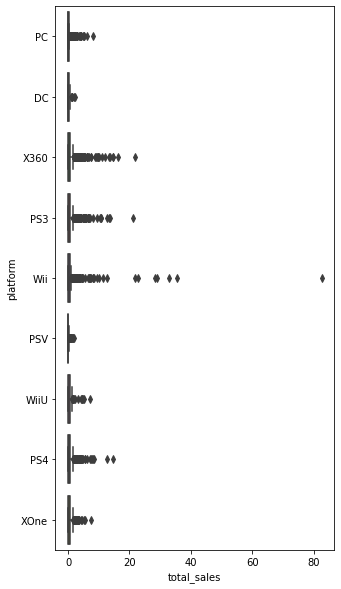

In [19]:
gp = ['XOne','X360','Wii','WiiU','PS3','PS4','PSV','PC','DC']
data_platform_high = data1[data1['platform'].isin(gp)]
plt.figure(figsize = (5,10))
sns.boxplot(y="platform", x='total_sales', data=data_platform_high);

In [20]:
data_platform_high.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
DC,52.0,0.306731,0.468660,0.02,0.0775,0.135,0.2975,2.41
PC,955.0,0.267738,0.680374,0.01,0.0200,0.050,0.1700,8.01
PS3,1306.0,0.713124,1.403065,0.00,0.1100,0.280,0.7600,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
PSV,429.0,0.125431,0.212341,0.01,0.0200,0.050,0.1300,1.96
Wii,1286.0,0.692986,3.165022,0.01,0.0900,0.190,0.4875,82.54
WiiU,147.0,0.559116,1.058836,0.01,0.0800,0.220,0.5250,7.09
X360,1232.0,0.780227,1.632122,0.01,0.1100,0.280,0.7700,21.82
XOne,247.0,0.645020,1.036139,0.01,0.0600,0.220,0.6850,7.39


The average sales on the various platforms ranges from 50 million dollars to 280 million dollars.

Text(0.5, 1.0, 'Does Critic Score affect Total Sales?')

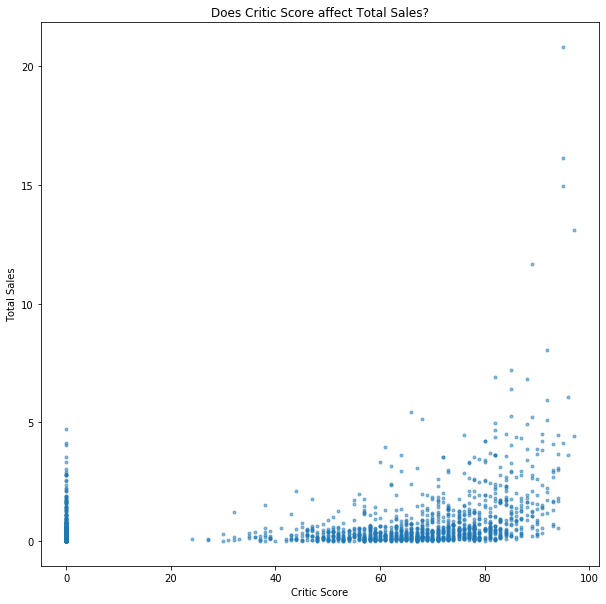

In [23]:
# Showing how critic score and professional reviews affect sales for PS2 
plt.figure(figsize=(10,10))
plt.plot(data_ps2['critic_score'], data_ps2['total_sales'], '.',alpha = 0.5)
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.title('Does Critic Score affect Total Sales?')

High professional review score equals to an increase in sales because feedbacks gotten from professionals are appreciated by customers which in turn influences their decision to purchase the game.

Text(0.5, 1.0, 'Does User Score affect Total Sales?')

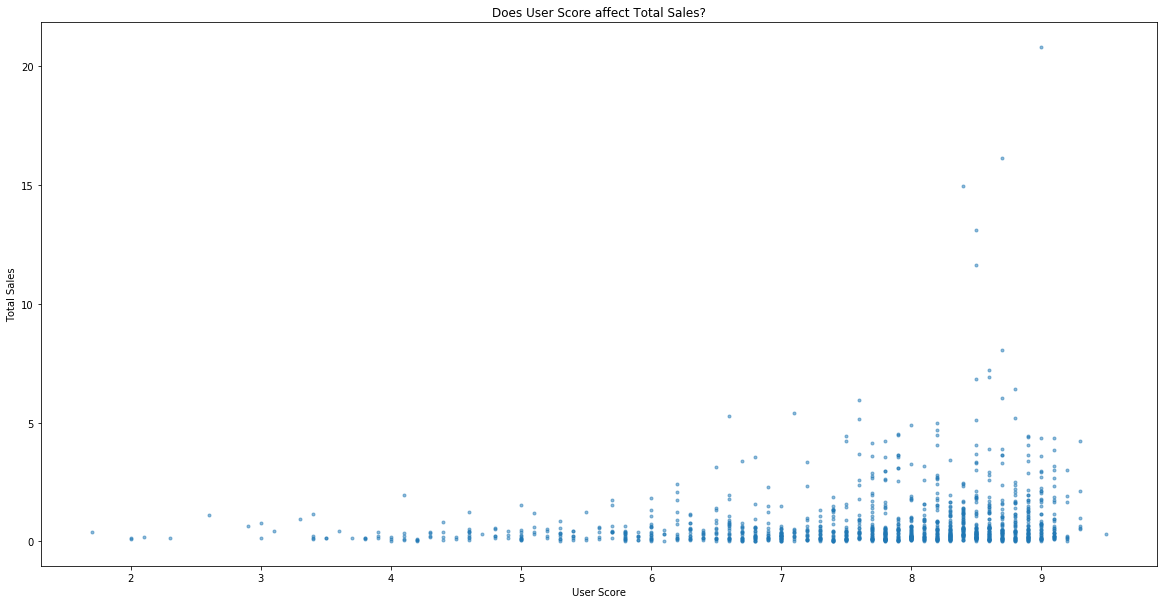

In [24]:
# Showing how user score affects Total Sales
data_ps2_user = data_ps2[data_ps2['user_score'].notnull()]
plt.figure(figsize=(20,10))
plt.plot(data_ps2_user['user_score'], data_ps2_user['total_sales'], '.', alpha = 0.5)
plt.xlabel('User Score')
plt.ylabel('Total Sales')
plt.title('Does User Score affect Total Sales?')

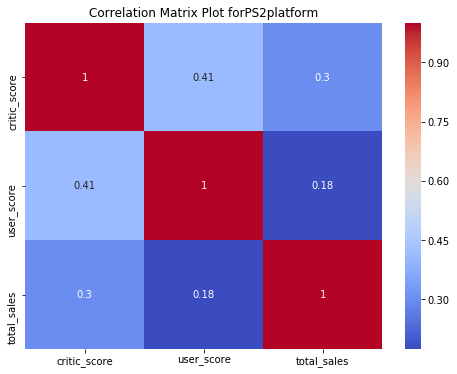

In [26]:
# Showing the correlation between reviews and sales
def corrMatrix(df, platform):
    df_platform = df[df.platform == platform].reset_index()[['critic_score', 'user_score', 'total_sales']]
    plt.figure(figsize=(8, 6))
    corrMatrix = df_platform.corr()
    sns.heatmap(corrMatrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix Plot for' + str(platform) + 'platform')
    plt.show();
    
# plot the correlation matrix
corrMatrix(data1, 'PS2')

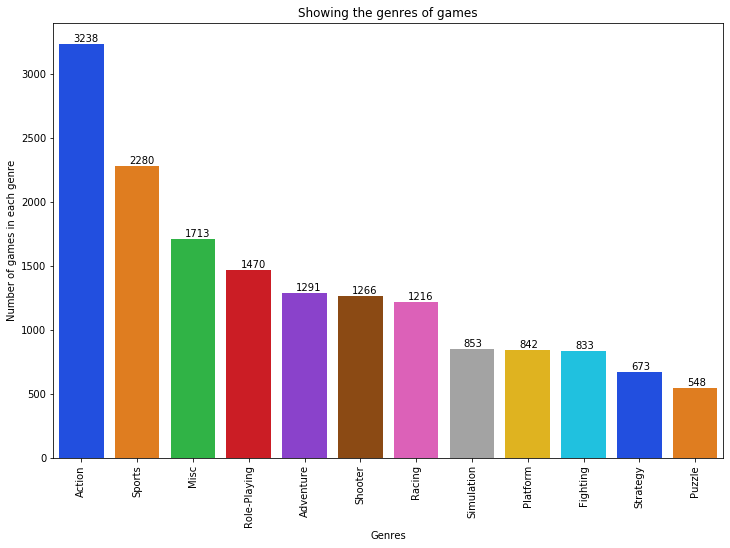

In [41]:
# Showing the top five genres of games
plt.figure(figsize=(12, 8)) 
bar_pl = sns.countplot(x="genre", data=data1, order = data1['genre'].value_counts().index, palette= 'bright') 

#Shows the angle at which the labels on the x-axis should be displayed
plt.xticks(rotation=90) 

for p in bar_pl.patches:
    bar_pl.annotate(str(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')
    
plt.title('Showing the genres of games')
plt.xlabel('Genres')
plt.ylabel('Number of games in each genre')

plt.show()

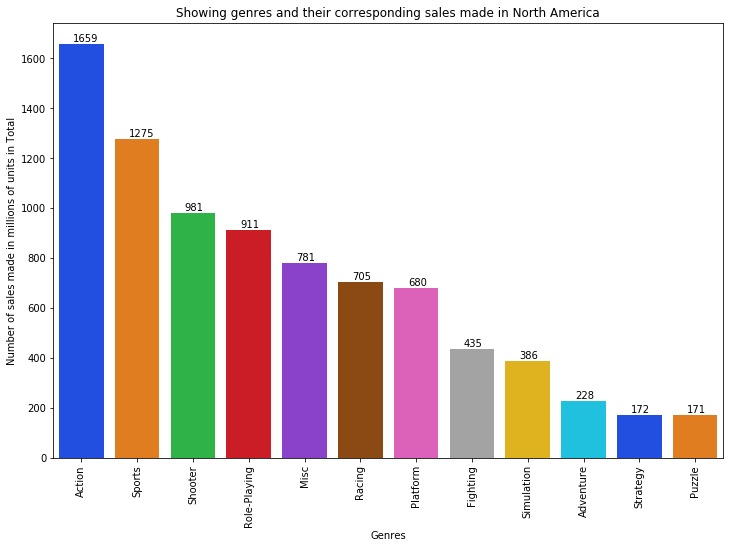

In [33]:
# Showing genres and their corresponding sales
plt.figure(figsize=(12, 8)) 
bar_pl = sns.barplot(x="genre", y ='total_sales', data=data1.groupby(by=['genre'])['total_sales'].sum().reset_index().sort_values(by=['total_sales'], ascending=False), palette= 'bright') 

#Shows the angle at which the labels on the x-axis should be displayed
plt.xticks(rotation=90) 

for p in bar_pl.patches:
    bar_pl.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
    

plt.title('Showing genres and their corresponding sales made in North America')
plt.xlabel('Genres')
plt.ylabel('Number of sales made in millions of units in Total')

plt.show()

In [31]:
#Showing the genre of the most made games in descending order with the most frequent games released 
data1['genre'].value_counts()
data1.groupby(data['genre']).count()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
genre,,,,,,,,,,,,
Action,3238,3238,3238,3238,3238,3238,3238,3238,3238,1796,2146,3238
Adventure,1291,1291,1291,1291,1291,1291,1291,1291,1291,298,440,1291
Fighting,833,833,833,833,833,833,833,833,833,395,432,833
Misc,1713,1713,1713,1713,1713,1713,1713,1713,1713,429,862,1713
Platform,842,842,842,842,842,842,842,842,842,424,561,842
Puzzle,548,548,548,548,548,548,548,548,548,125,336,548
Racing,1216,1216,1216,1216,1216,1216,1216,1216,1216,629,856,1216
Role-Playing,1470,1470,1470,1470,1470,1470,1470,1470,1470,737,770,1470
Shooter,1266,1266,1266,1266,1266,1266,1266,1266,1266,905,996,1266


#### CREATE A USER PROFILE FOR EACH REGION

##### SHOWING TOP FIVE PLATFORMS AND THEIR CORRESPONDING SALES FROM REGION TO REGION

In [38]:
# Showing top five platforms and their corresponding sales in North America
data1.groupby(by=['platform'])['na_sales'].sum().reset_index().sort_values(by=['na_sales'], ascending=False).head()

,platform,na_sales
27,X360,595.74
15,PS2,572.92
25,Wii,486.87
16,PS3,390.13
3,DS,380.31


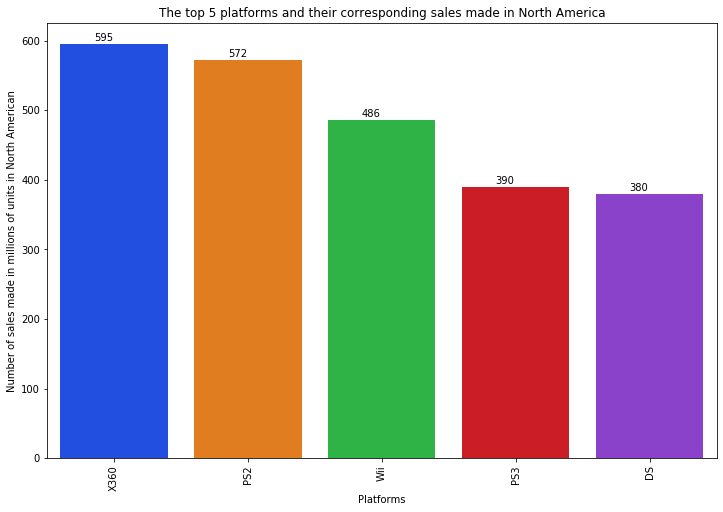

In [54]:
plt.figure(figsize=(12, 8)) 
bar_pl = sns.barplot(x="platform", y ='na_sales', data=data1.groupby(by=['platform'])['na_sales'].sum().reset_index().sort_values(by=['na_sales'], ascending=False).head(), palette= 'bright') 

#Shows the angle at which the labels on the x-axis should be displayed
plt.xticks(rotation=90) 

for p in bar_pl.patches:
    bar_pl.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
    

plt.title('The top 5 platforms and their corresponding sales made in North America')
plt.xlabel('Platforms')
plt.ylabel('Number of sales made in millions of units in North American')

plt.show()

In [42]:
# Showing top five platforms and their corresponding sales in Europe
data1.groupby(by=['platform'])['eu_sales'].sum().reset_index().sort_values(by=['eu_sales'], ascending=False).head()

,platform,eu_sales
15,PS2,332.63
16,PS3,327.21
27,X360,268.32
25,Wii,258.32
14,PS,212.39


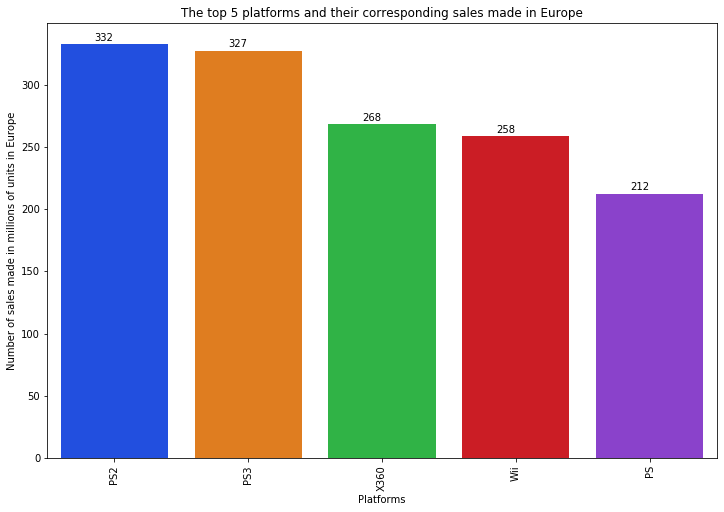

In [55]:
plt.figure(figsize=(12, 8)) 
bar_pl = sns.barplot(x="platform", y ='eu_sales', data=data1.groupby(by=['platform'])['eu_sales'].sum().reset_index().sort_values(by=['eu_sales'], ascending=False).head(), palette= 'bright') 

#Shows the angle at which the labels on the x-axis should be displayed
plt.xticks(rotation=90) 

for p in bar_pl.patches:
    bar_pl.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
    

plt.title('The top 5 platforms and their corresponding sales made in Europe')
plt.xlabel('Platforms')
plt.ylabel('Number of sales made in millions of units in Europe')

plt.show()

In [44]:
# Showing top five platforms and their corresponding sales in Japan
data1.groupby(by=['platform'])['jp_sales'].sum().reset_index().sort_values(by=['jp_sales'], ascending=False).head()

,platform,jp_sales
3,DS,175.00
14,PS,139.78
15,PS2,137.54
22,SNES,110.95
1,3DS,100.62


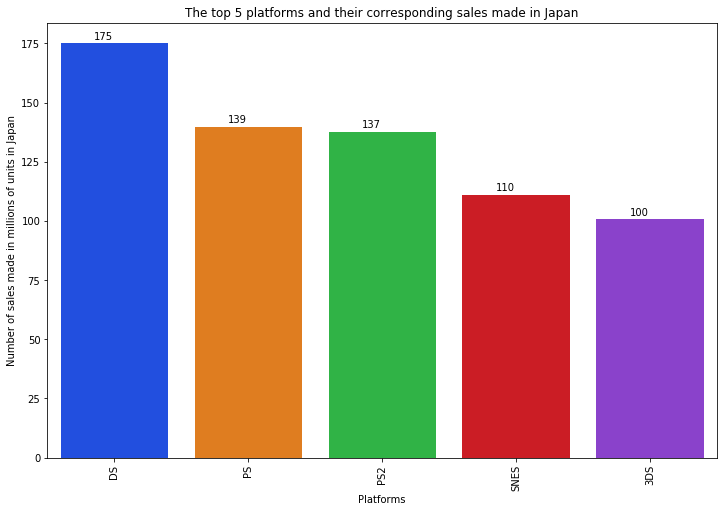

In [56]:
plt.figure(figsize=(12, 8)) 
bar_pl = sns.barplot(x="platform", y ='jp_sales', data=data1.groupby(by=['platform'])['jp_sales'].sum().reset_index().sort_values(by=['jp_sales'], ascending=False).head(), palette= 'bright') 

#Shows the angle at which the labels on the x-axis should be displayed
plt.xticks(rotation=90) 

for p in bar_pl.patches:
    bar_pl.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
    

plt.title('The top 5 platforms and their corresponding sales made in Japan')
plt.xlabel('Platforms')
plt.ylabel('Number of sales made in millions of units in Japan')

plt.show()

In [46]:
# Showing top five platforms and their corresponding sales in Other Countries
data1.groupby(by=['platform'])['other_sales'].sum().reset_index().sort_values(by=['other_sales'], ascending=False).head()

,platform,other_sales
15,PS2,190.47
16,PS3,134.59
27,X360,84.88
25,Wii,77.71
3,DS,59.04


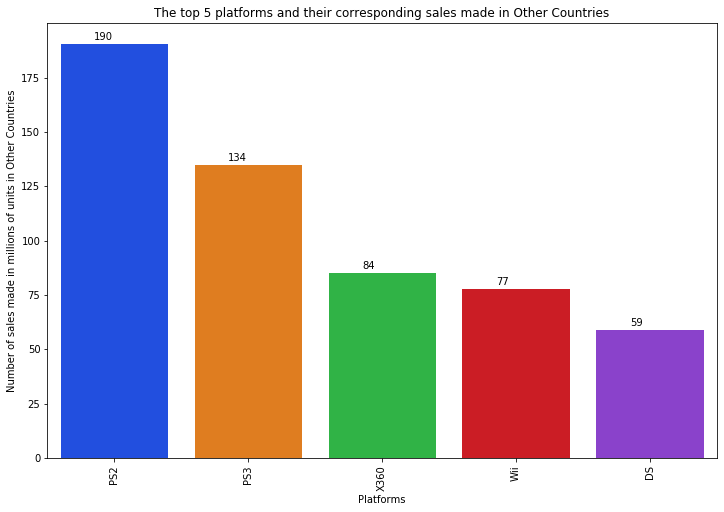

In [57]:
plt.figure(figsize=(12, 8)) 
bar_pl = sns.barplot(x="platform", y ='other_sales', data=data1.groupby(by=['platform'])['other_sales'].sum().reset_index().sort_values(by=['other_sales'], ascending=False).head(), palette= 'bright') 

#Shows the angle at which the labels on the x-axis should be displayed
plt.xticks(rotation=90) 

for p in bar_pl.patches:
    bar_pl.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
    

plt.title('The top 5 platforms and their corresponding sales made in Other Countries')
plt.xlabel('Platforms')
plt.ylabel('Number of sales made in millions of units in Other Countries')

plt.show()

##### SHOWING TOP FIVE GENRES AND THEIR CORRESPONDING SALES FROM REGION TO REGION

In [49]:
# Showing top five genres and their corresponding sales in North America
data1.groupby(by=['genre'])['na_sales'].sum().reset_index().sort_values(by=['na_sales'], ascending=False).head()

,genre,na_sales
0,Action,821.00
10,Sports,659.77
8,Shooter,533.99
3,Misc,396.22
4,Platform,355.96


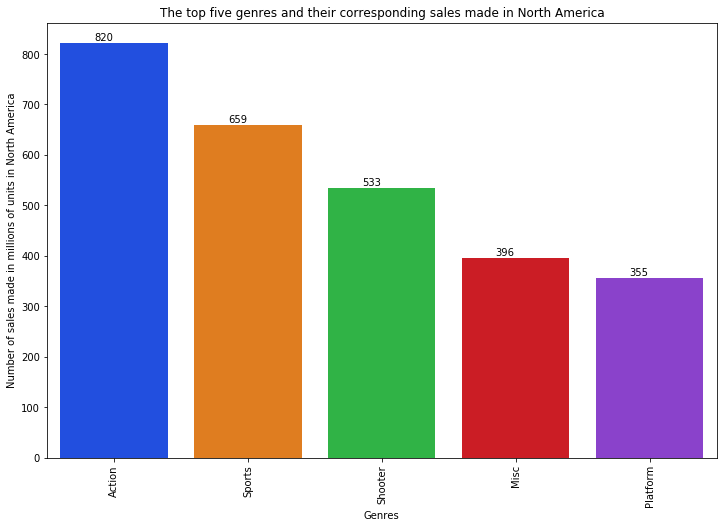

In [58]:
plt.figure(figsize=(12, 8)) 
bar_pl = sns.barplot(x="genre", y ='na_sales', data=data1.groupby(by=['genre'])['na_sales'].sum().reset_index().sort_values(by=['na_sales'], ascending=False).head(), palette= 'bright') 

#Shows the angle at which the labels on the x-axis should be displayed
plt.xticks(rotation=90) 

for p in bar_pl.patches:
    bar_pl.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
    

plt.title('The top five genres and their corresponding sales made in North America')
plt.xlabel('Genres')
plt.ylabel('Number of sales made in millions of units in North America')

plt.show()

In [59]:
# Showing top five genres and their corresponding sales in Europe
data1.groupby(by=['genre'])['eu_sales'].sum().reset_index().sort_values(by=['eu_sales'], ascending=False).head()

,genre,eu_sales
0,Action,505.73
10,Sports,368.26
8,Shooter,311.69
6,Racing,231.93
3,Misc,210.40


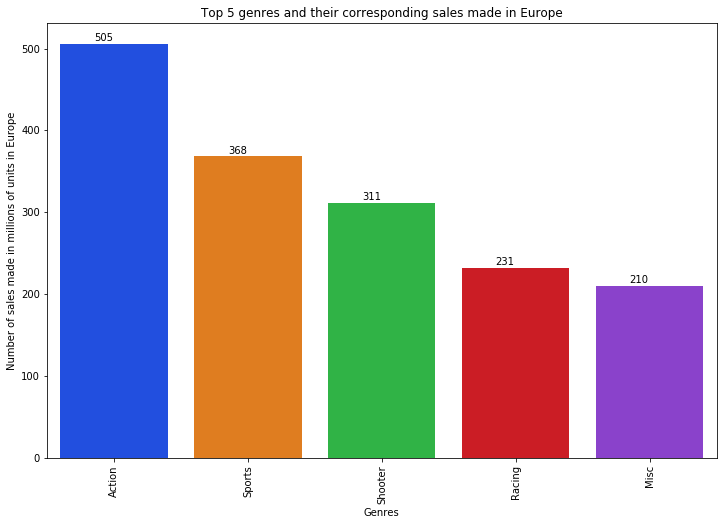

In [60]:
plt.figure(figsize=(12, 8)) 
bar_pl = sns.barplot(x="genre", y ='eu_sales', data=data1.groupby(by=['genre'])['eu_sales'].sum().reset_index().sort_values(by=['eu_sales'], ascending=False).head(), palette= 'bright') 

#Shows the angle at which the labels on the x-axis should be displayed
plt.xticks(rotation=90) 

for p in bar_pl.patches:
    bar_pl.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
    

plt.title('Top 5 genres and their corresponding sales made in Europe')
plt.xlabel('Genres')
plt.ylabel('Number of sales made in millions of units in Europe')

plt.show()

In [61]:
# Showing top five genres and their corresponding sales in Japan
data1.groupby(by=['genre'])['jp_sales'].sum().reset_index().sort_values(by=['jp_sales'], ascending=False).head()

,genre,jp_sales
7,Role-Playing,336.29
0,Action,150.82
10,Sports,115.45
3,Misc,102.16
4,Platform,93.98


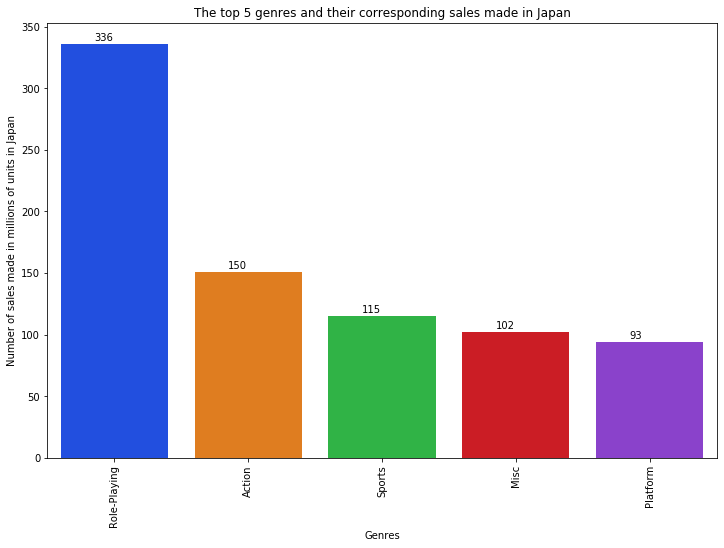

In [63]:
plt.figure(figsize=(12, 8)) 
bar_pl = sns.barplot(x="genre", y ='jp_sales', data=data1.groupby(by=['genre'])['jp_sales'].sum().reset_index().sort_values(by=['jp_sales'], ascending=False).head(), palette= 'bright') 

#Shows the angle at which the labels on the x-axis should be displayed
plt.xticks(rotation=90) 

for p in bar_pl.patches:
    bar_pl.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
    

plt.title('The top 5 genres and their corresponding sales made in Japan')
plt.xlabel('Genres')
plt.ylabel('Number of sales made in millions of units in Japan')

plt.show()

In [68]:
# Showing top five genres and their corresponding sales in Other Countries
data1.groupby(by=['genre'])['other_sales'].sum().reset_index().sort_values(by=['other_sales'], ascending=False).head()

,genre,other_sales
0,Action,181.48
10,Sports,131.80
8,Shooter,102.53
6,Racing,74.81
3,Misc,73.07


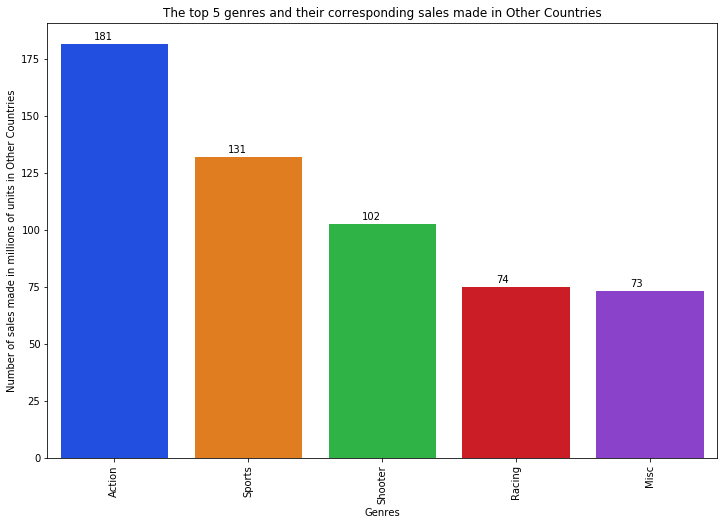

In [69]:
plt.figure(figsize=(12, 8)) 
bar_pl = sns.barplot(x="genre", y ='other_sales', data=data1.groupby(by=['genre'])['other_sales'].sum().reset_index().sort_values(by=['other_sales'], ascending=False).head(), palette= 'bright') 

#Shows the angle at which the labels on the x-axis should be displayed
plt.xticks(rotation=90) 

for p in bar_pl.patches:
    bar_pl.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
    

plt.title('The top 5 genres and their corresponding sales made in Other Countries')
plt.xlabel('Genres')
plt.ylabel('Number of sales made in millions of units in Other Countries')

plt.show()

#### TESTING HYPOTHESIS

##### Test 1:- Average user ratings of the Xbox One and PC platforms are the same
Ho : There is no difference in the rating Xone and PC

H1: There is a signifcance difference in the rating of Xone and PC

##### Test 2:- Average user ratings for the Action and Sports genres are differenct
Ho : There is no difference in the rating of action and sports games

H1: There is a significance difference in the rating of action and sports games

In [64]:
# Function for hypothesis testing
def hypothesis_test(variable1, variable2, alpha):
    variable1 = variable1
    variable2 = variable2
    # set critical statistical significance level
    alpha = alpha
    # test the hypothesis that the means of the two independent population are equal
    results = st.ttest_ind(variable1, variable2, equal_var = False)
    #print('The p-value is: {}'.format(results.pvalue))
    # compare the p-value with the significance level
    if (results.pvalue < alpha):
        print('We reject the null hypohesis')
    else:
        print('We fail to reject the null hypothesis')

In [65]:
# Calculation of average user ratings
xbox1 = data[data.platform == 'XOne']['user_score'].mean()
pc = data[data.platform == 'PC']['user_score'].mean()
print('The average user rating for the Xbox is {:.3f}'.format(xbox1) + ' and ' + \
      'the average user rating for the PC is {:.3f}'.format(pc))

The average user rating for the Xbox is 6.521 and the average user rating for the PC is 7.066


In [67]:
# Hypothesis testing
hypothesis_test(xbox1, pc, 0.05)

We fail to reject the null hypothesis


#### FINAL CONCLUSION

To know whether a game will succed or not, There are four major factors to consider: 
1. The genre of the game
2. The platform the game will be played on 
3. The user score 
4. The location.

Based on the data analyzed above, successful games have user score that ranges from 7 to 10 and critic score that ranges form 70-100.

In North Amereica, The top 5 genres of games that will succeed include: Action, sport, shooter, Platform and Misc
In North Amereica, The top 5 platforms for games that will succeed include: X360, PS2, Wii, PS3, DS

In Europe, The top 5 genres of games that will succeed include: Action, sport, shooter, racing and Misc
In Europe, The top 5 platforms for games that will succeed include: PS2, PS3, X360, Wii, PS

In Japan, The top 5 genres of games that will succeed include: Role playing, action, sport, misc and Platform
In Japan, The top 5 platforms for games that will succeed include: DS, PS, PS2, SNES, 3DS

In Other Countries, The top 5 genres of games that will succeed include: Action, Sports, Shooter, Racing, Misc
In Other Countries, The top 5 platforms for games that will succeed include: PS2, PS3, X360, Wii, DS